<a href="https://colab.research.google.com/github/KKobuszewski/aluminium-prediction/blob/main/Aluminium_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates

import datetime
#from datetime import datetime

from IPython.display import HTML

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Stock\ analysis
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Stock analysis
'ALU-LME (Metals-API).csv'       'Projekt dane finansowe.gdoc'
'Aluminium data.ipynb'            sde_240317_161637.pdf
'Aluminium Historical Data.csv'  'Stochastic differential equation - numerical integration.ipynb'


## Dailymetalprices.com

Dane ze strony https://www.dailymetalprice.com/metalpricewidget.php

In [ ]:
html_text = f'''<div id="DMP_2" data-pym-src="//dailymetalprice.com/prices.php?c=al,cu,fe,pb,ni,zn&u=kg&x=EUR"></div>

<script type="text/javascript" src="//dailymetalprice.com/js/pym.min.js"></script>'''
display(HTML(html_text))

print(HTML(html_text))

<IPython.core.display.HTML object>


## Metals-API

www.metals-API.com

https://medium.com/@aleb/how-to-get-lme-prices-with-an-api-8ef8a3d44a42

https://medium.com/python-in-plain-english/coding-stock-breakouts-in-python-a-step-by-step-guide-592211e36774


To see how to convert value of metal in USD see https://metals-api.com/#faq.

In [ ]:
api_key = '6b9sj91ewv1t3cdzud574gt7ok8afq82td7rvhqavkexspc82jflxaq9nfd3'

url = f'https://metals-api.com/api/timeseries?access_key={api_key}' + \
       '&base=USD' + \
       '&start_date=2024-03-01' + \
       '&end_date=2024-03-31' + \
       '&symbols=LME-ALU'
print(url)


response = requests.get(url)
response.raise_for_status()  # raises exception when not a 2xx response
print(response.status_code)

data = response.json()

print(data)

https://metals-api.com/api/timeseries?access_key=6b9sj91ewv1t3cdzud574gt7ok8afq82td7rvhqavkexspc82jflxaq9nfd3&base=USD&start_date=2024-03-01&end_date=2024-03-31&symbols=LME-ALU
200
{'data': {'success': False, 'error': {'code': 501, 'type': 'invalid_timeframe', 'info': 'No or an invalid timeframe has been specified.'}}}


In [ ]:
def metals_api_convert_price(price):
  return (1.0/price)/31.1035*1000000

dates = np.empty(len(data['rates']), dtype=datetime.datetime)
values = np.empty(len(data['rates']), dtype=np.float64)
it = 0
for key,value in data['rates'].items():
  print(key, value['LME-ALU'])
  dates[it] = datetime.datetime.strptime(str(key),'%Y-%m-%d')
  values[it] = value['LME-ALU']
  it += 1
#print(type(key), type(value['LME-ALU']))
print(dates)
print(values)

2024-01-01 13.896995893668
2024-01-02 13.896995893668
2024-01-03 13.760196875669
2024-01-04 14.254356018621
2024-01-05 14.381883247596
2024-01-06 14.511712931618
2024-01-07 14.511712931618
2024-01-08 14.511712931618
2024-01-09 14.577510768533
2024-01-10 14.613954545455
2024-01-11 14.587431941924
2024-01-12 14.594053563323
2024-01-13 14.781931034483
2024-01-14 14.781931034483
2024-01-15 14.781931034483
2024-01-16 14.932977241059
2024-01-17 14.894927032662
2024-01-18 15.009663865546
2024-01-19 15.090682938277
2024-01-20 15.151131008483
2024-01-21 15.151131008483
2024-01-22 15.151131008483
2024-01-23 15.237298578199
2024-01-24 14.988671328671
2024-01-25 14.564303510759
2024-01-26 14.690747087046
2024-01-27 14.534674502712
2024-01-28 14.534674502712
2024-01-29 14.534674502712
2024-01-30 14.521544715447
2024-01-31 14.440017965417
[datetime.datetime(2024, 1, 1, 0, 0) datetime.datetime(2024, 1, 2, 0, 0)
 datetime.datetime(2024, 1, 3, 0, 0) datetime.datetime(2024, 1, 4, 0, 0)
 datetime.datetim

In [ ]:
# https://stackoverflow.com/questions/42950/get-the-last-day-of-the-month

In [ ]:
def last_day_of_month(any_day):
    # The day 28 exists in every month. 4 days later, it's always next month
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    # subtracting the number of the current day brings us back one month
    return next_month - datetime.timedelta(days=next_month.day)

for year in range(2010,2024):
  for month in range(1, 13):
    print(last_day_of_month(datetime.date(year, month, 1)))

In [ ]:
365*14

5110

In [ ]:
df = pd.DataFrame({'Date': dates, 'ALU-LME': values})
df.to_csv('/content/drive/MyDrive/Stock analysis/ALU-LME (Metals-API).csv', mode='a')
df

[*********************100%%**********************]  1 of 1 completed

0    2024-01-01
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
5    2024-01-06
6    2024-01-07
7    2024-01-08
8    2024-01-09
9    2024-01-10
10   2024-01-11
11   2024-01-12
12   2024-01-13
13   2024-01-14
14   2024-01-15
15   2024-01-16
16   2024-01-17
17   2024-01-18
18   2024-01-19
19   2024-01-20
20   2024-01-21
21   2024-01-22
22   2024-01-23
23   2024-01-24
24   2024-01-25
25   2024-01-26
26   2024-01-27
27   2024-01-28
28   2024-01-29
29   2024-01-30
30   2024-01-31
Name: Date, dtype: datetime64[ns]


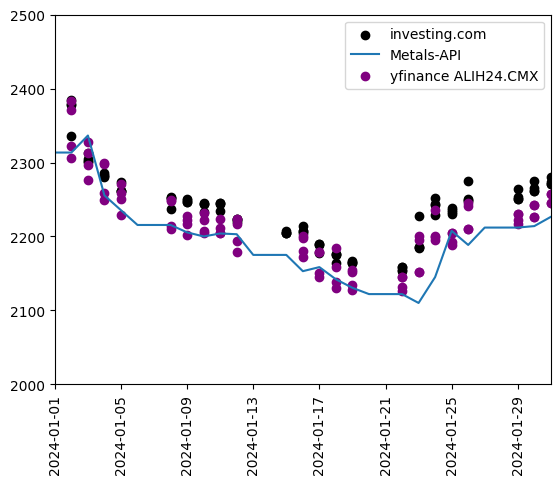

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stock analysis/ALU-LME (Metals-API).csv')
df['ALU-LME'] = (1.0/df['ALU-LME'])/31.1035*1000000  # one troyan ounce is 31,1035g
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
print(df['Date'])

yfdata = yf.download(["ALIH24.CMX"], start="2024-01-01", end="2024-03-15")
yfdata['Date'] = pd.to_datetime(yfdata.index)

plt.xticks(rotation = 90)
plt.ylim([2000, 2500])
plt.xlim([pd.to_datetime('2024-01-01', format="%Y-%m-%d" ),
          pd.to_datetime('2024-01-31', format="%Y-%m-%d" )])
plt.scatter(aludata['Date'], aludata['Price'], color='k', label='investing.com')
plt.scatter(aludata['Date'], aludata['Low'], color='k')
plt.scatter(aludata['Date'], aludata['High'], color='k')
plt.scatter(aludata['Date'], aludata['Open'], color='k')
plt.plot( df['Date'],df['ALU-LME'], label='Metals-API')
plt.scatter(yfdata['Date'],yfdata['Open'], color='purple', label='yfinance ALIH24.CMX')
plt.scatter(yfdata['Date'],yfdata['High'], color='purple')
plt.scatter(yfdata['Date'],yfdata['Low'], color='purple')
plt.scatter(yfdata['Date'],yfdata['Close'], color='purple')
#plt.plot(data.axes[0].tolist(),data['Open'])
#plt.plot(data.index,data['Open'])

plt.legend(loc='best')
plt.show()

In [ ]:
aludata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2467 non-null   datetime64[ns]
 1   Price     2467 non-null   float64       
 2   Open      2467 non-null   float64       
 3   High      2467 non-null   float64       
 4   Low       2467 non-null   float64       
 5   Vol.      2447 non-null   float64       
 6   Change %  2467 non-null   float64       
 7   Daily     2467 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 154.3 KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2024-01-02 to 2024-03-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       51 non-null     float64       
 1   High       51 non-null     float64       
 2   Low        51 non-null     float64       
 3   Close      51 non-null     float64       
 4   Adj Close  51 non-null     float64       
 5   Volume     51 non-null     int64         
 6   Date       51 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.2 KB


## Yahoo Finance API


https://finance.yahoo.com/quote/ALI=F/history

https://finance.yahoo.com/quote/ALUM.MI/history

In [ ]:
import yfinance as yf

# ALI=F
# ALUM.MI
# ALIH24.CMX  <---
# ALIJ24.CMX
# ALIK24.CMX
# ALIM24.CMX
# ALIN24.CMX
# ALIQ24.CMX
# ALIU24.CMX
# ALIV24.CMX
# ALIX24.CMX

data = yf.download(["ALIH24.CMX"], start="2024-01-01", end="2024-03-15")
data.head()

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALIH24.CMX']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


## Historical Aluminium prices (www.investing.com)

https://www.investing.com/commodities/aluminum-historical-data

In [ ]:
def price_converter(x):
  if x == 'NaN':
    return np.nan
  thousands, hundreds = x.split(',')
  return float(thousands)*1000 + float(hundreds)

def volume_converter(x):
  if type(x) == float:
    return x
  return float( x[:-1] )

#aludata = np.loadtxt('Aluminium Historical Data.csv')
aludata = pd.read_csv('Aluminium Historical Data.csv')

# convert data to suitable formats
aludata['Date']  = pd.to_datetime( aludata['Date'], format="%m/%d/%Y" )
aludata['Price'] = aludata['Price'].apply(price_converter)
aludata['Open']  = aludata['Open'].apply(price_converter)
aludata['High']  = aludata['High'].apply(price_converter)
aludata['Low']   = aludata['Low'].apply(price_converter)
aludata['Vol.']  = aludata['Vol.'].apply(volume_converter)

# What with Change %? Maybe better drop?
aludata['Change %']  = aludata['Change %'].apply(volume_converter)

aludata['Daily'] = aludata['High']-aludata['Low']

print(aludata.dtypes)
aludata.head()

NameError: name 'pd' is not defined

In [ ]:
corr = aludata[['Price','Vol.','Daily']].corr()
corr.style.background_gradient(cmap='coolwarm')

NameError: name 'aludata' is not defined

In [ ]:
plt.figure(figsize=[16.,12.])

plt.grid(True)
plt.xlim([datetime.datetime(2024, 1, 1), datetime.datetime(2024, 3, 15)])
plt.ylim([2000,2500])
plt.plot(aludata['Date'], aludata['Price'], color='k', label='Price')
plt.plot(aludata['Date'], aludata['Low'], color='b', label='Low')
plt.plot(aludata['Date'], aludata['High'], color='r', label='High')

#plt.errorbar(aludata['Date'], aludata['Price'],
#             yerr=[aludata['Price']-aludata['Low'], aludata['High']-aludata['Price']], fmt='-' )

plt.legend(loc='best')
plt.show()

## Al + Alpha Vintage API


Ogólnie Alpha Vintage: https://www.alphavantage.co/documentation/#symbolsearch

Pobieranie danych Aluminium

**Tylko dane z miesięczną rozdzielczością**

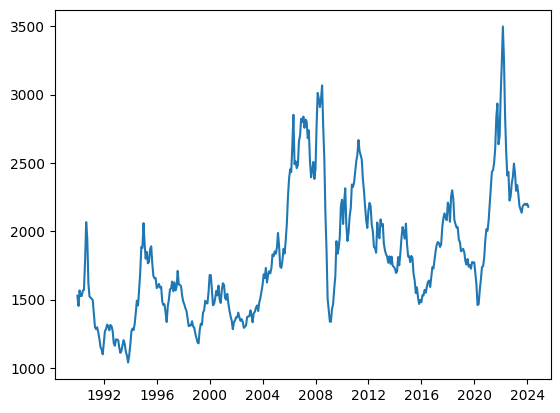

In [ ]:
apikey = 'M6V1WYGSXGCN8V7Y'

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=ALUMINUM&interval=daily&apikey={apikey}'
r = requests.get(url)
data = r.json()

dates = []
price = []
for d in data['data']:
  if '1989-12-01' in d['date']:
    break
  dates.append( datetime.strptime(d['date'], '%Y-%m-%d') )
  price.append( float(d['value']) )

plt.plot(dates, price)
plt.show()

In [ ]:
for d in data['data']:
  if '1989-12-01' in d['date']:
    break
  print( datetime.strptime(d['date'], '%Y-%m-%d'),  float(d['value']) )

2024-02-01 00:00:00 2179.45714285714
2024-01-01 00:00:00 2201.56652173913
2023-12-01 00:00:00 2192.00523809524
2023-11-01 00:00:00 2202.25545454545
2023-10-01 00:00:00 2194.39090909091
2023-09-01 00:00:00 2184.67380952381
2023-08-01 00:00:00 2135.58173913043
2023-07-01 00:00:00 2159.73238095238
2023-06-01 00:00:00 2184.75363636364
2023-05-01 00:00:00 2274.01260869565
2023-04-01 00:00:00 2338.131
2023-03-01 00:00:00 2296.41695652174
2023-02-01 00:00:00 2416.1815
2023-01-01 00:00:00 2494.90090909091
2022-12-01 00:00:00 2398.20681818182
2022-11-01 00:00:00 2350.71636363636
2022-10-01 00:00:00 2255.53523809524
2022-09-01 00:00:00 2224.75590909091
2022-08-01 00:00:00 2433.91608695652
2022-07-01 00:00:00 2408.42333333333
2022-06-01 00:00:00 2575.66954545455
2022-05-01 00:00:00 2839.50545454545
2022-04-01 00:00:00 3246.99047619048
2022-03-01 00:00:00 3498.37304347826
2022-02-01 00:00:00 3245.7855
2022-01-01 00:00:00 3005.9805
2021-12-01 00:00:00 2695.53142857143
2021-11-01 00:00:00 2636.45227